# 简单二分类
秉持着不想筛选特征、不想处理类别特征的想法，找了一个简单的二分类数据集进行sklearn上面api的调用和使用
数据集选自https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv
预测飞机乘客的满意度

## 模型
比较重要的一点是要知道有哪些模型，模型的基本原理，模型的适用性，至于参数及调参可以参考官方用户文档
### 线性模型
线性回归、岭回归（l2正则化）、lasso回归（l1正则化）、弹性回归（综合l1和l2）
### 支持向量机
支持向量机（线性可分（感觉这里的正负样本有点扯，其实应该不要有那么明确的界定，用同号、异号区分预测是否正确比较好）、线性不可分、核函数）
超平面分割空间使得不同类点之间间隔最大
### KNN
分类：k个最相似的点中类别占比最高的
### 朴素贝叶斯
生成式方法，利用贝叶斯原理进行分类（先验概率，条件概率，全概率）
### 决策树
单棵树-
集成：Randomforest(bagging),gbdt(提升树)，xgboost，lightgbm

## 数据处理
这里针对表格型数据进行说明
### 数据清洗
对重复值，缺失值进行处理
### 探索分析
主要目的是查看数据特征分布，特征间的关系，初步探索异常数据，进一步对因变量与自变量之间的关系进行分析

描述统计，相关系数计算，kdeplot
### 类别特征处理
根据模型确定类别特征如何进行处理：独热编码，标签编码，不处理

## 模型训练
### 特征选择
结合模型和上述数据处理结果对特征进行选择

### 特征衍生
暴力构造

有意义构造

是一门玄学

### 集成学习
各种各样的集成方法

In [148]:
s1 = 'aabbccab'
s2 = 'ab'
count = s1.count(s2)# 
count

2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print(train_data.info)    #10w
print(test_data.info)     #2.6w

<bound method DataFrame.info of         Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  F

In [4]:
train = train_data.drop('Unnamed: 0',axis=1)
test = test_data.drop('Unnamed: 0',axis=1)

In [5]:
# 查看数据类型，便于对类别型数据做处理
for i in train.columns:
    print('{}:{}'.format(i,train[i].dtypes))

id:int64
Gender:object
Customer Type:object
Age:int64
Type of Travel:object
Class:object
Flight Distance:int64
Inflight wifi service:int64
Departure/Arrival time convenient:int64
Ease of Online booking:int64
Gate location:int64
Food and drink:int64
Online boarding:int64
Seat comfort:int64
Inflight entertainment:int64
On-board service:int64
Leg room service:int64
Baggage handling:int64
Checkin service:int64
Inflight service:int64
Cleanliness:int64
Departure Delay in Minutes:int64
Arrival Delay in Minutes:float64
satisfaction:object


In [28]:
train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,0,13,0,1,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,1,25,1,2,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,0,26,1,2,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,0,25,1,2,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,0,61,1,2,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,1,23,1,0,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,0,0,49,1,2,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,0,1,30,1,2,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,1,1,22,1,0,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0


In [6]:
# 查看类别特征的数目
# 类别数据较为简单，可以直接使用label编码
for i in train.columns[train.dtypes=='object']:
    print('{}:{}'.format(i, train[i].unique()))

Gender:['Male' 'Female']
Customer Type:['Loyal Customer' 'disloyal Customer']
Type of Travel:['Personal Travel' 'Business travel']
Class:['Eco Plus' 'Business' 'Eco']
satisfaction:['neutral or dissatisfied' 'satisfied']


特征解释

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer) 会员（常旅客），非会员

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus) 会员（常旅客），非会员

Flight distance: The flight distance of this journey

对各项服务的评价得分

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
正样本是较为满意的顾客

Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.



类别特征

Gender:['Male' 'Female']

Customer Type:['Loyal Customer' 'disloyal Customer']会员（常旅客），非会员

Type of Travel:['Personal Travel' 'Business travel']

Class:['Eco Plus' 'Business' 'Eco'] 客舱类型

satisfaction:['neutral or dissatisfied' 'satisfied'] 正样本是较为满意的顾客

In [7]:
score_feature = list(train.columns)[7:-3] # 该系列特征为评分（0-5分）系列特征
print(score_feature)
pair_feature = list(train.columns).copy()
for x in ['id']+score_feature:
    pair_feature.remove(x)
print(pair_feature)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [7]:
for i in test.columns[test.dtypes=='object']:
    print('{}:{}'.format(i,test[i].unique()))

Gender:['Female' 'Male']
Customer Type:['Loyal Customer' 'disloyal Customer']
Type of Travel:['Business travel' 'Personal Travel']
Class:['Eco' 'Business' 'Eco Plus']
satisfaction:['satisfied' 'neutral or dissatisfied']


In [8]:
cate_feature = list(train.columns[train.dtypes=='object'])
cate_feature

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [117]:
for i in train.columns[train.dtypes=='object']:
    if i != 'Class':
        k = 0
        for j in train[i].unique():
            train[i] = train[i].replace({j:k})
            # 保证标签编码的一致性
            test[i] = test[i].replace({j:k})
            k += 1
    else:
        train['Class'] = train['Class'].replace({'Eco':0 ,'Business':2, 'Eco Plus':1})
        test['Class'] = test['Class'].replace({'Eco':0 ,'Business':2, 'Eco Plus':1})

In [119]:
test['Class'] = test['Class'].replace({'Eco':0 ,'Business':2, 'Eco Plus':1})
test

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,1,0,52,1,0,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,1,0,36,1,2,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,0,1,20,1,0,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,0,0,44,1,2,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,1,0,49,1,0,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,0,1,34,1,2,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,71167,0,0,23,1,2,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,37675,1,0,17,0,0,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,0
25974,90086,0,0,14,1,2,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [10]:
sum(train['satisfaction']) # 大致可以看做是1:1的分布

45025

## 描述性统计分析

In [12]:
# 做一个描述统计性分析
train.describe()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,64924.210502,0.507459,0.182678,39.379706,0.689627,1.028103,1189.448375,2.729683,3.060296,2.756901,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,37463.812252,0.499947,0.386404,15.114964,0.462649,0.962858,997.147281,1.327829,1.525075,1.398929,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64856.500000,1.000000,0.000000,40.000000,1.000000,1.000000,843.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97368.250000,1.000000,0.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


[]

<Figure size 1080x720 with 0 Axes>

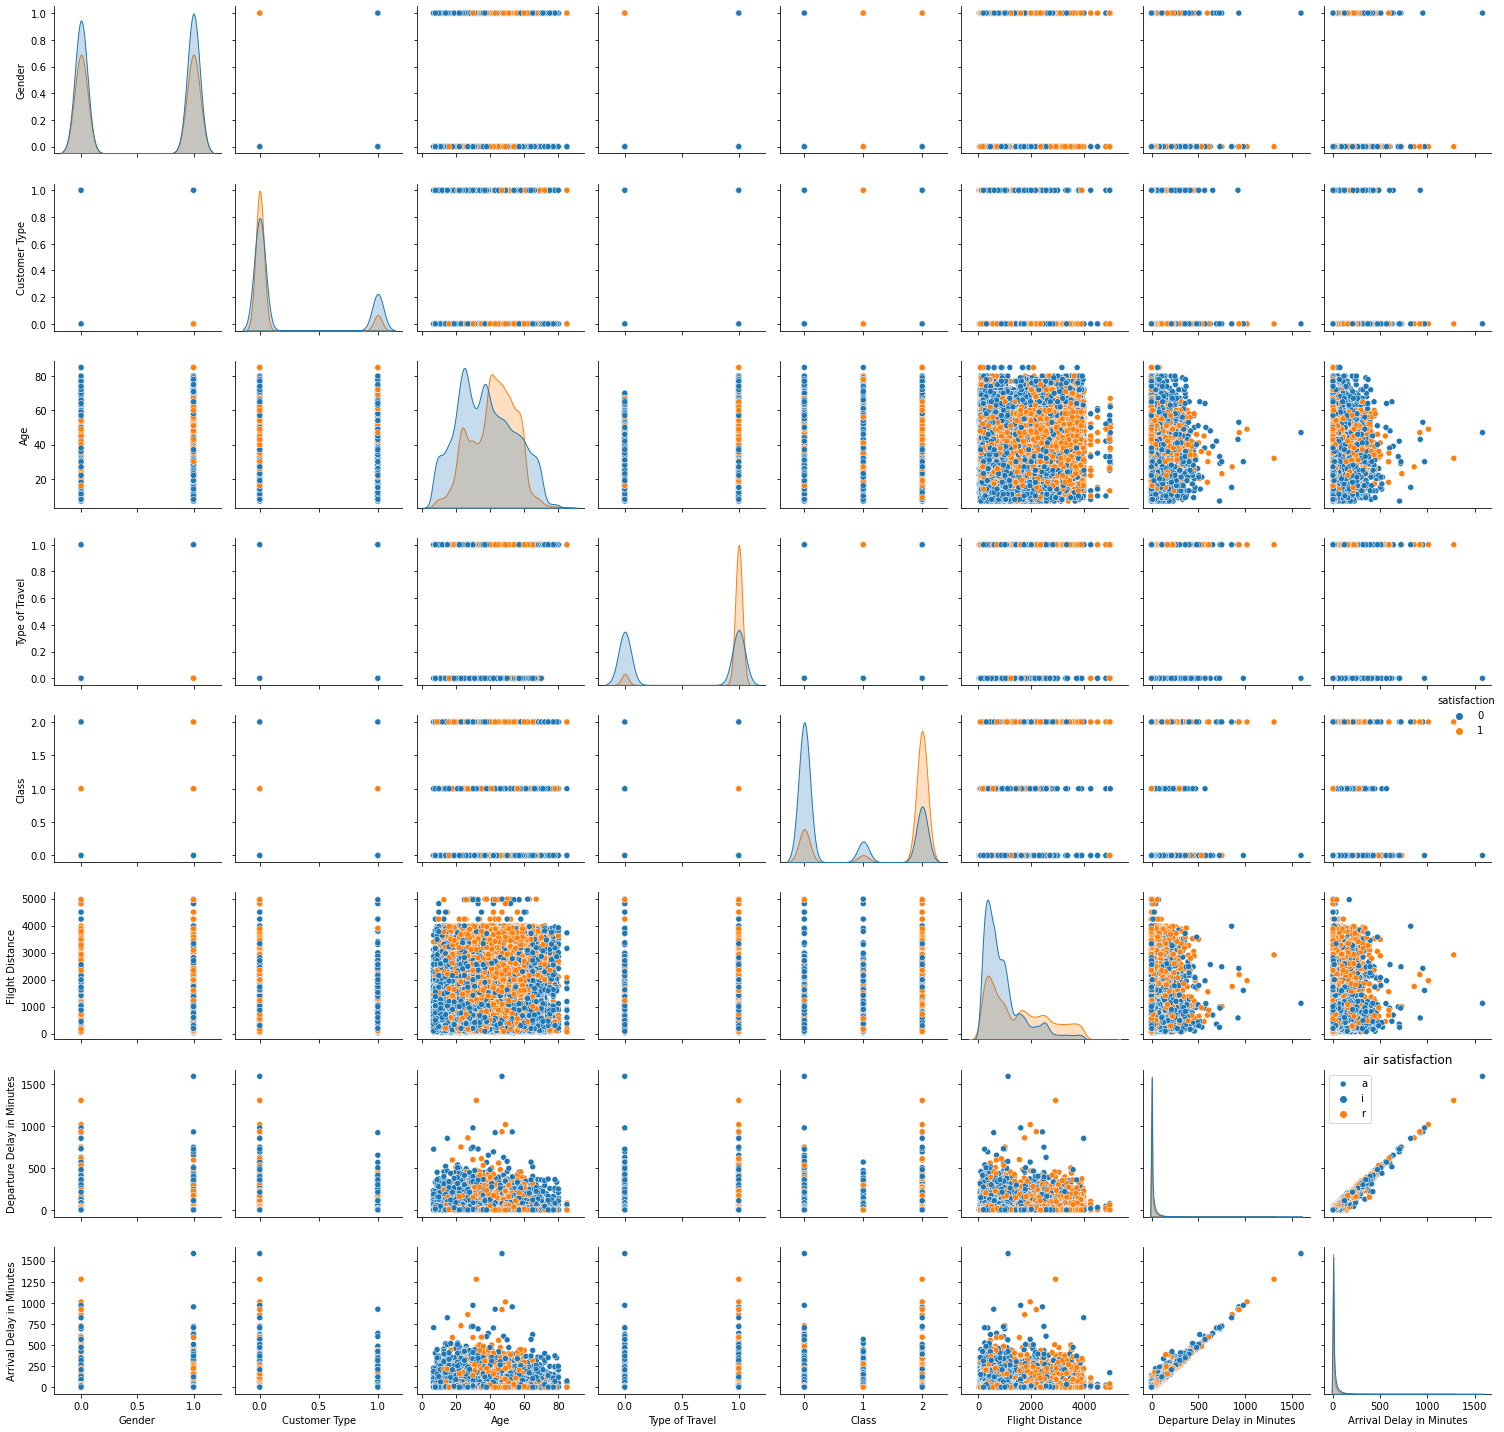

In [14]:
plt.figure(figsize=(15,10))
sns.pairplot(train.loc[:,pair_feature],hue='satisfaction',diag_kind="kde")
plt.title("air satisfaction")
plt.legend("air")
plt.tight_layout()
plt.plot()

In [136]:
# train.drop(['id'],axis=1,inplace=True)
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,1,23,1,0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,0,0,49,1,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,0,1,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,1,1,22,1,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


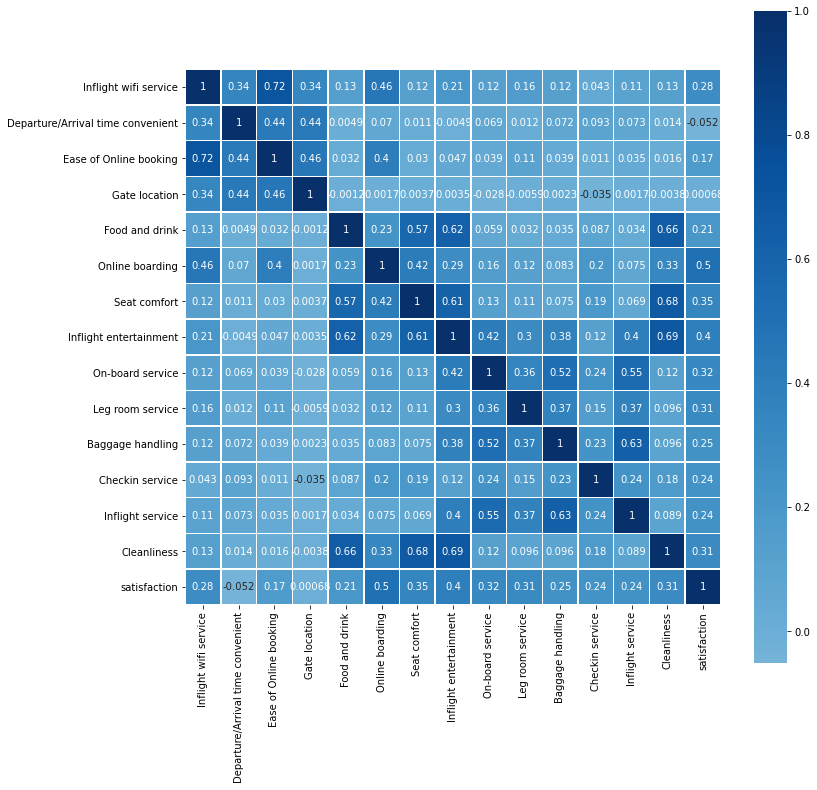

In [141]:
plt.subplots(figsize=(12,12))
sns.heatmap(train.loc[:,score_feature+['satisfaction']].corr(),annot=True,center=0,square=True, linewidths=0.5,cmap="Blues")
plt.show()

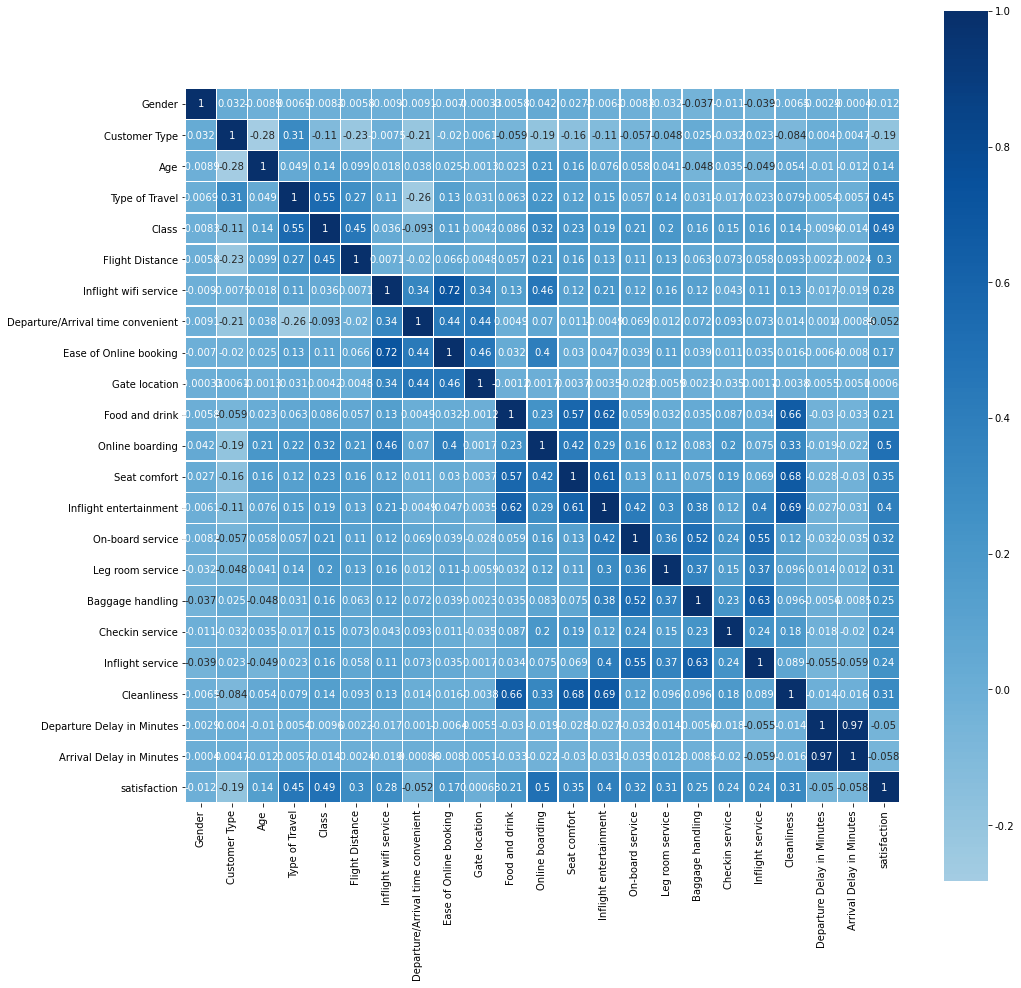

In [143]:
plt.subplots(figsize=(16,16))
sns.heatmap(train.corr(),annot=True,center=0,square=True, linewidths=0.5,cmap="Blues")
plt.show()

# 训练

In [20]:
# 为了使用距离型监督学习
train_nontree = pd.get_dummies(train_data.drop('Unnamed: 0',axis=1),columns=cate_feature,drop_first=False)
test_nontree = pd.get_dummies(test_data.drop('Unnamed: 0',axis=1),columns=cate_feature,drop_first=False)
# train_nontree['satisfaction'].replace({'neutral or dissatisfied':0,'satisfied':1},inplace=True)
# test_nontree['satisfaction'].replace({'neutral or dissatisfied':0,'satisfied':1},inplace=True)
train_nontree.drop('satisfaction_neutral or dissatisfied',axis=1,inplace=True)
test_nontree.drop('satisfaction_neutral or dissatisfied',axis=1,inplace=True)
train_nontree.rename(columns={'satisfaction_satisfied':'label'},inplace=True)
test_nontree.rename(columns={'satisfaction_satisfied':'label'},inplace=True)

In [21]:
train_nontree

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,label
0,70172,13,460,3,4,3,1,5,3,5,...,0,1,1,0,0,1,0,0,1,0
1,5047,25,235,3,2,3,3,1,3,1,...,0,1,0,1,1,0,1,0,0,0
2,110028,26,1142,2,2,2,2,5,5,5,...,1,0,1,0,1,0,1,0,0,1
3,24026,25,562,2,5,5,5,2,2,2,...,1,0,1,0,1,0,1,0,0,0
4,119299,61,214,3,3,3,3,4,5,5,...,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,...,1,0,0,1,1,0,0,1,0,0
103900,73097,49,2347,4,4,4,4,2,4,5,...,0,1,1,0,1,0,1,0,0,1
103901,68825,30,1995,1,1,1,3,4,1,5,...,0,1,0,1,1,0,1,0,0,0
103902,54173,22,1000,1,1,1,5,1,1,1,...,1,0,0,1,1,0,0,1,0,0


In [25]:
use_col = list(train.columns)[:-1]
use_col

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

## logistic 回归

In [27]:
used_col = list(train_nontree.columns)[1:-1]
used_col

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Gender_Female',
 'Gender_Male',
 'Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Type of Travel_Business travel',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus']

In [66]:
l = list(train_nontree.columns)[-10:]

['Gender_Female',
 'Gender_Male',
 'Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Type of Travel_Business travel',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'label']

In [69]:
train_nontree[list(train_nontree.columns)[-10:]] = train_nontree[list(train_nontree.columns)[-10:]].astype('int64')
test_nontree[list(test_nontree.columns)[-10:]] = test_nontree[list(test_nontree.columns)[-10:]].astype('int64')

In [71]:
train_nontree.dtypes

id                                     int64
Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Gender_Female                          int64
Gender_Male                            int64
Customer Type_Loyal Customer           int64
Customer T

In [83]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.model_selection import StratifiedKFold
acc_log=[]

df_nontree = train_nontree
y = train_nontree['label']
target = ['label']


folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)
for fold , (trn_,val_) in enumerate(folds.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,used_col]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,used_col]
    y_valid=df_nontree.loc[val_,target]
    
    # print(pd.DataFrame(X_valid).head())
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
 
    
    clf=LogisticRegression()
    clf.fit(X_train,y_train.values.ravel())
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass


AttributeError: 'str' object has no attribute 'decode'

In [128]:
from sklearn.naive_bayes import GaussianNB
auc_Gauss=[]
test_Gauss=[]
df_nontree = train_nontree
y = train_nontree['label']
target = ['label']
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)
for fold , (trn_,val_) in enumerate(folds.split(X=df_nontree,y=y)):
     
    X_train=df_nontree.loc[trn_,used_col]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,used_col]
    y_valid=df_nontree.loc[val_,target]
    
    X_test = test_nontree.loc[:,used_col]
    y_test = test_nontree.loc[:,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    X_test = ro_scaler.transform(X_test)
    
    
    clf=GaussianNB()
    clf.fit(X_train,y_train.values.ravel())
    y_pred=clf.predict(X_valid)
    pred_y = clf.predict_proba(X_test)[:,1]
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    
    y_pred=clf.predict_proba(X_valid)[:,1]
    acc=roc_auc_score(y_valid,y_pred)
    test_auc = roc_auc_score(y_test,pred_y)
    auc_Gauss.append(acc)
    test_Gauss.append(test_auc)
    print(f"The valid auc for {fold+1} : {acc}")
    print(f"The test auc for {fold+1} : {test_auc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     11776
           1       0.83      0.81      0.82      9005

    accuracy                           0.85     20781
   macro avg       0.84      0.84      0.84     20781
weighted avg       0.85      0.85      0.85     20781

The valid auc for 1 : 0.9148446647243078
The test auc for 1 : 0.9131476745436262
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     11776
           1       0.83      0.82      0.82      9005

    accuracy                           0.85     20781
   macro avg       0.85      0.84      0.85     20781
weighted avg       0.85      0.85      0.85     20781

The valid auc for 2 : 0.9172758227615094
The test auc for 2 : 0.9129870495856863
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     11776
           1      

In [130]:
from sklearn.svm import SVC

auc_svm=[]
test_svm=[]

"""df_nontree = train_nontree
y = train_nontree['label']
target = ['label']"""

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)
for fold , (trn_,val_) in enumerate(folds.split(X=df_nontree,y=y)):
     
    X_train=df_nontree.loc[trn_,used_col]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,used_col]
    y_valid=df_nontree.loc[val_,target]
    
    X_test = test_nontree.loc[:,used_col]
    y_test = test_nontree.loc[:,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    X_test = ro_scaler.transform(X_test)
    
    
    clf=SVC(kernel="linear",probability=True)
    clf.fit(X_train,y_train.values.ravel())
    y_pred = clf.predict(X_valid)
    pred_y = clf.predict_proba(X_test)[:,1]
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    
    y_pred=clf.predict_proba(X_valid)[:,1]
    acc=roc_auc_score(y_valid,y_pred)
    test_auc = roc_auc_score(y_test,pred_y)
    auc_svm.append(acc)
    test_svm.append(test_auc)
    print(f"The valid auc for {fold+1} : {acc}")
    print(f"The test auc for {fold+1} : {test_auc}")
    pass


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11776
           1       0.88      0.82      0.85      9005

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781

The valid auc for 1 : 0.9261540803116626
The test auc for 1 : 0.92604584903785
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11776
           1       0.88      0.83      0.86      9005

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781

The valid auc for 2 : 0.9294565886931777
The test auc for 2 : 0.9260773277264079
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11776
           1       0

In [131]:
from sklearn.neighbors import KNeighborsClassifier
auc_knn=[]
test_knn=[]

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)
for fold , (trn_,val_) in enumerate(folds.split(X=df_nontree,y=y)):
     
    X_train=df_nontree.loc[trn_,used_col]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,used_col]
    y_valid=df_nontree.loc[val_,target]
    
    X_test = test_nontree.loc[:,used_col]
    y_test = test_nontree.loc[:,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    X_test = ro_scaler.transform(X_test)
    
    
    clf = KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train.values.ravel())
    y_pred=clf.predict(X_valid)
    pred_y = clf.predict_proba(X_test)[:,1]
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    
    y_pred=clf.predict_proba(X_valid)[:,1]
    acc=roc_auc_score(y_valid,y_pred)
    test_auc = roc_auc_score(y_test,pred_y)
    auc_knn.append(acc)
    test_knn.append(test_auc)
    print(f"The valid auc for {fold+1} : {acc}")
    print(f"The test auc for {fold+1} : {test_auc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     11776
           1       0.96      0.84      0.90      9005

    accuracy                           0.92     20781
   macro avg       0.93      0.91      0.91     20781
weighted avg       0.92      0.92      0.92     20781

The valid auc for 1 : 0.9779200310289573
The test auc for 1 : 0.9786072312920382
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11776
           1       0.96      0.86      0.91      9005

    accuracy                           0.92     20781
   macro avg       0.93      0.92      0.92     20781
weighted avg       0.92      0.92      0.92     20781

The valid auc for 2 : 0.9792615402373078
The test auc for 2 : 0.9789248705764642
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     11776
           1      

## TREE

In [112]:
X_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,52,1,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,1,0,36,1,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,0,1,20,1,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,0,0,44,1,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,1,0,49,1,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,1,34,1,Business,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0,0.0
25972,0,0,23,1,Business,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,1,0,17,0,Eco,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0,0.0
25974,0,0,14,1,Business,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0


In [116]:
test

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,1,0,52,1,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,1,0,36,1,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,0,1,20,1,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,0,0,44,1,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,1,0,49,1,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,0,1,34,1,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,71167,0,0,23,1,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,37675,1,0,17,0,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,0
25974,90086,0,0,14,1,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [125]:
from sklearn.ensemble import RandomForestClassifier
auc_rf=[]
test_rf=[]
kf=model_selection.StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)
df_tree = train.fillna(0)
y = train['satisfaction']
target = ['satisfaction']
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,use_col]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,use_col]
    y_valid=df_tree.loc[val_,target]
    
    X_test = test.loc[:,use_col].fillna(0)
    y_test = test.loc[:,target]
    
    clf=RandomForestClassifier(n_estimators=500,criterion="entropy")
    clf.fit(X_train,y_train.values.ravel())
    y_pred=clf.predict(X_valid)
    pred_y = clf.predict_proba(X_test)[:,1]
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    
    y_pred=clf.predict_proba(X_valid)[:,1]
    acc=roc_auc_score(y_valid,y_pred)
    test_auc = roc_auc_score(y_test,pred_y)
    auc_rf.append(acc)
    test_rf.append(test_auc)
    print(f"The valid auc for {fold+1} : {acc}")
    print(f"The test auc for {fold+1} : {test_auc}")
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11776
           1       0.98      0.93      0.95      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

The valid auc for 1 : 0.9942332714841393
The test auc for 1 : 0.9941117581543206
The accuracy for 1 : 0.9942332714841393
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

The valid auc for 2 : 0.9940266805277262
The test auc for 2 : 0.9941010345789031
The accuracy for 2 : 0.9940266805277262
The fold is : 2 : 
              precision    recall  f1-score   s

In [ ]:
from sklearn.model_selection import train_test_split
df_x = train.loc[:,use_col]
df

In [126]:
from xgboost import XGBClassifier
auc_xgb = []
test_xgb = []
kf=model_selection.StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)
df_tree = train.fillna(0)
y = train['satisfaction']
target = ['satisfaction']
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,use_col]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,use_col]
    y_valid=df_tree.loc[val_,target]
    
    clf=XGBClassifier(max_depth=7,n_estimators=1000,learning_rate=0.05)
    clf.fit(X_train,y_train.values.ravel())
    y_pred=clf.predict(X_valid)
    pred_y = clf.predict_proba(X_test)[:,1]
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    
    y_pred=clf.predict(X_valid)
    pred_y = clf.predict_proba(X_test)[:,1]
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    
    y_pred=clf.predict_proba(X_valid)[:,1]
    acc=roc_auc_score(y_valid,y_pred)
    test_auc = roc_auc_score(y_test,pred_y)
    auc_xgb.append(acc)
    test_xgb.append(test_auc)
    print(f"The valid auc for {fold+1} : {acc}")
    print(f"The test auc for {fold+1} : {test_auc}")
    print(f"The accuracy for {fold+1} : {acc}")

[08:50:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

The valid auc for 1 : 0.995265764188977
The test auc for 1 : 0.9953804407725284
The accuracy for 1 : 0.995265764188977


/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[08:51:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.95      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.95      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
we

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

The valid auc for 3 : 0.9952827384544818
The test auc for 3 : 0.9953532136025075
The accuracy for 3 : 0.9952827384544818
[08:52:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the def

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


The fold is : 3 : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

The fold is : 3 : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

The valid auc for 4 : 0.9951989421637736
The test auc for 4 : 0.9953287335212511
The accuracy for 4 : 0.9951989421637736
[08:52:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the def

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


The fold is : 4 : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11775
           1       0.97      0.95      0.96      9005

    accuracy                           0.96     20780
   macro avg       0.97      0.96      0.96     20780
weighted avg       0.96      0.96      0.96     20780

The fold is : 4 : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11775
           1       0.97      0.95      0.96      9005

    accuracy                           0.96     20780
   macro avg       0.97      0.96      0.96     20780
weighted avg       0.96      0.96      0.96     20780

The valid auc for 5 : 0.9954823776835469
The test auc for 5 : 0.9954590893521703
The accuracy for 5 : 0.9954823776835469


In [124]:
y_pred=clf.predict_proba(X_valid)[:,1]
# pred_y = clf.predict_proba(X_test)[:,1]
#print(f"The fold is : {fold} : ")
#print(classification_report(y_valid,y_pred))

acc=roc_auc_score(y_valid,y_pred)
print(acc)

0.9954823776835469


/Users/MC/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [134]:
# 训练集上的平均准确率
print(sum(auc_Gauss)/len(auc_Gauss))
print(sum(auc_svm)/len(auc_svm))
print(sum(auc_knn)/len(auc_knn))
print(sum(auc_rf)/len(auc_RandF))
print(sum(auc_xgb)/len(auc_xgb))

0.9157173822485231
0.9270933363339863
0.9787441489519404
0.994253089952126
0.9952719556820995


In [133]:
print(sum(test_Gauss)/len(auc_Gauss))
print(sum(test_svm)/len(auc_svm))
print(sum(test_knn)/len(auc_knn))
print(sum(test_rf)/len(auc_RandF))
print(sum(test_xgb)/len(auc_xgb))

0.9131853731466351
0.926095147396176
0.9788869914418827
0.9940787587881491
0.9953611660182844


In [59]:
# 判断是否有缺失值
train.isnull().values.any()

True

In [56]:
import numpy as np
df = pd.DataFrame(np.random.randn(10,6))

df.isnull().values.any()

False

In [76]:
y_train.values.ravel()

array([0, 0, 1, ..., 1, 0, 0])